# Long Analysis Visualization

Visualize long-term performance metrics: temporal mean, zonal mean, spectra, divergence, and return periods for truth, train, and a single emulator run.

In [8]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

from src.inference.utils.long_metrics import return_period_bins, corr_truth_train_model

In [9]:
Lx, Ly = 2 * np.pi, 2 * np.pi
Nx, Ny = 256, 256
target_step = 3

In [ ]:
# Set analysis directories
truth_dir = '/glade/derecho/scratch/dpatel/SSL-2DTurb/TRUTH/IC1/analysis/truth'
train_dir = '/glade/derecho/scratch/dpatel/SSL-2DTurb/BASE/BASE_seed_0_2phase_1000epochs/analysis/train'
emulator_dir_0 = '/glade/derecho/scratch/jshen/pruning-turbulence-vit/vit128/base/long_analyses'
emulator_dir_1 = '/glade/derecho/scratch/jshen/pruning-turbulence-vit/vit128_taylor/long_analyses/41.05'

# Setup for plotting
analysis_dirs = [truth_dir, train_dir, emulator_dir_0, emulator_dir_1]
labels = ['Truth', 'Train', 'Emulator 0', 'Emulator 1']
colors = ['black', 'red', 'blue', 'green']
linestyles = ['--', '--', '-', '-']

plt_kwargs = [
    {'color': 'black', 'linestyle': '--', 'label': 'Truth'},
    {'color': 'red', 'linestyle': '--', 'label': 'Train'},
    {'color': 'blue', 'linestyle': '-', 'label': 'Emulator 0'}, 
    {'color': 'green', 'linestyle': '-', 'label': 'Emulator 1'}
]

# Spectra

FileNotFoundError: [Errno 2] No such file or directory: '/glade/derecho/scratch/jshen/pruning-turbulence-vit/vit128_taylor/long_analyses/41.05/spectra.npz'

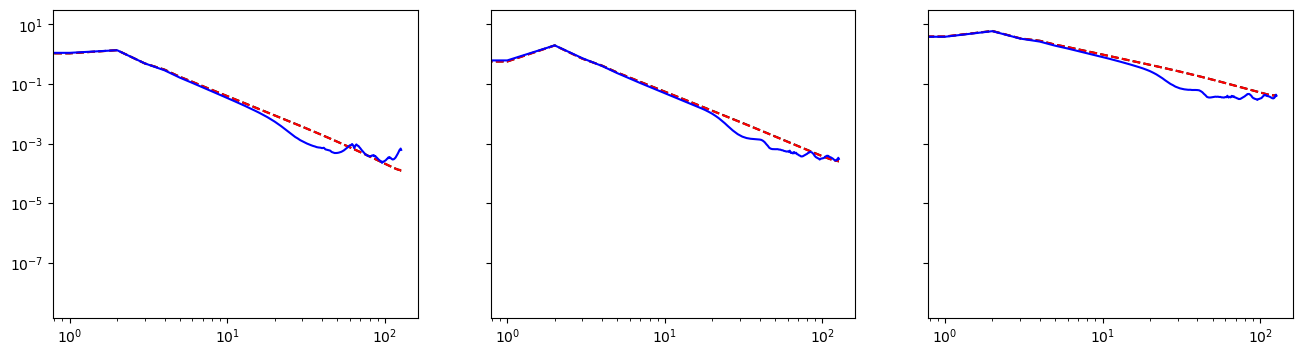

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

for kwargs, analysis_dir in zip(plt_kwargs, analysis_dirs):
    data = np.load(os.path.join(analysis_dir, "spectra.npz"))

    U_spectra = data['spectra_U_zonal_avg']
    V_spectra = data['spectra_V_zonal_avg']
    Omega_spectra = data['spectra_Omega_zonal_avg']
    wavenumbers = data['wavenumber_zonal_avg']

    axes[0].loglog(wavenumbers[:-1], U_spectra[:-1], **kwargs)
    axes[1].loglog(wavenumbers[:-1], V_spectra[:-1], **kwargs)
    axes[2].loglog(wavenumbers[:-1], Omega_spectra[:-1], **kwargs)

for ax in axes:
    ax.set_xlabel('$k$')
    ax.set_ylim([1e-4, 10])
    ax.grid(True, alpha=0.3)

axes[0].set_title('$\hat{u}$ Spectra')
axes[1].set_title('$\hat{v}$ Spectra')
axes[2].set_title('$\hat{\omega}$ Spectra')
axes[0].set_ylabel('Power')

axes[2].legend(frameon=False)
fig.tight_layout()

# Zonal Mean

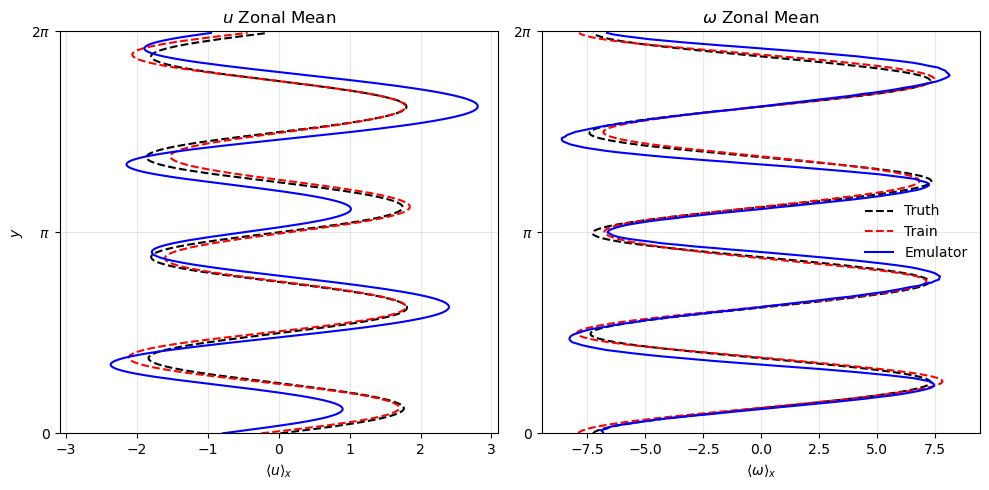

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

dx = Lx / Nx
y = np.linspace(0, 2*np.pi - dx, Nx)

# Store data for setting axis limits
U_data, Omega_data = [], []

for kwargs, analysis_dir in zip(plt_kwargs, analysis_dirs):
    data = np.load(os.path.join(analysis_dir, "zonal_mean.npz"))

    U_mean_zonal = data['U_zonal_mean']
    Omega_mean_zonal = data['Omega_zonal_mean']

    axes[0].plot(U_mean_zonal, y, **kwargs)
    axes[1].plot(Omega_mean_zonal, y, **kwargs)
    
    U_data.append(U_mean_zonal)
    Omega_data.append(Omega_mean_zonal)

# Set axis properties
for ax in axes:
    ax.set_yticks([0, np.pi, 2*np.pi])
    ax.set_yticklabels(['0', r'$\pi$', r'$2\pi$'])
    ax.set_ylim([0, 2*np.pi])
    ax.grid(True, alpha=0.3)

axes[0].set_title(r'$u$ Zonal Mean')
axes[1].set_title(r'$\omega$ Zonal Mean')
axes[0].set_xlabel(r'$\langle u \rangle_x$')
axes[1].set_xlabel(r'$\langle \omega \rangle_x$')
axes[0].set_ylabel('$y$')

# Set symmetric x-axis limits
U_max = np.max(np.abs(U_data))
Omega_max = np.max(np.abs(Omega_data))
axes[0].set_xlim([-1.1*U_max, 1.1*U_max])
axes[1].set_xlim([-1.1*Omega_max, 1.1*Omega_max])

axes[1].legend(frameon=False)
fig.tight_layout()

# Temporal Mean

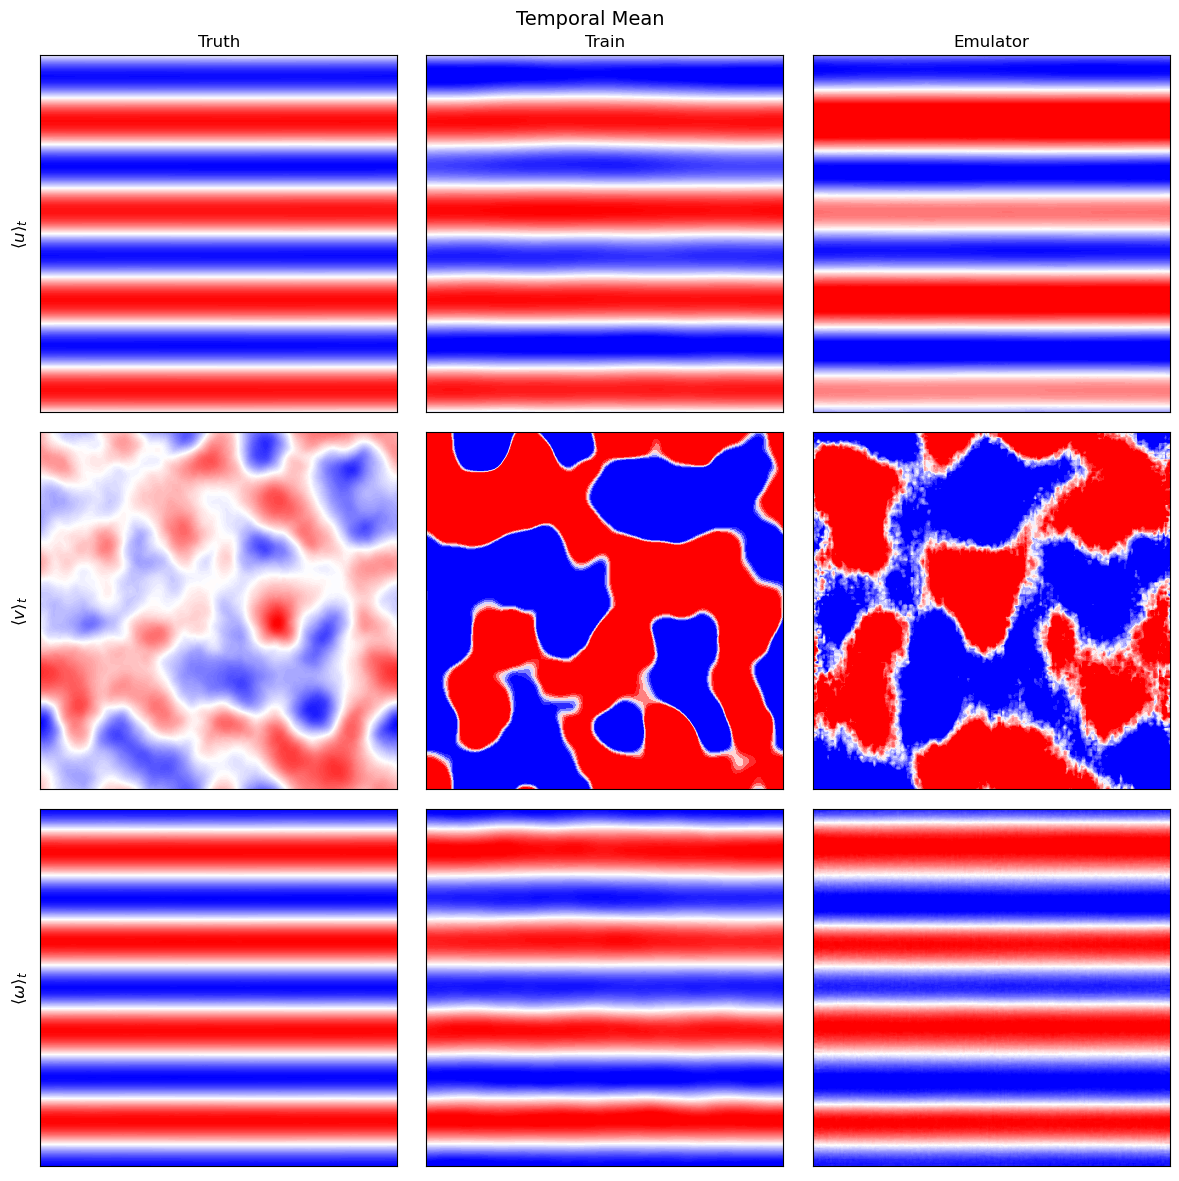

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

from src.inference.utils.plot_config import contourLevels, colormap

# Load data and find global vmax for each variable
vmax_U, vmax_V, vmax_Omega = 0, 0, 0

for i, (label, analysis_dir) in enumerate(zip(labels, analysis_dirs)):
    data = np.load(os.path.join(analysis_dir, "temporal_mean.npz"))
    
    U_mean = data['U_sample_mean']
    V_mean = data['V_sample_mean']
    Omega_mean = data['Omega_sample_mean']
    
    if i == 0:
        vmax_U = np.max(np.abs(U_mean))
        vmax_V = np.max(np.abs(V_mean))
        vmax_Omega = np.max(np.abs(Omega_mean))
    
    # Plot
    axes[0, i].contourf(U_mean, levels=contourLevels, cmap=colormap, vmax=vmax_U, vmin=-vmax_U)
    axes[1, i].contourf(V_mean, levels=contourLevels, cmap=colormap, vmax=vmax_V, vmin=-vmax_V)
    axes[2, i].contourf(Omega_mean, levels=contourLevels, cmap=colormap, vmax=vmax_Omega, vmin=-vmax_Omega)
    
    axes[0, i].set_title(f'{label}')

# Row labels
axes[0, 0].set_ylabel(r'$\langle u \rangle_t$', fontsize=12)
axes[1, 0].set_ylabel(r'$\langle v \rangle_t$', fontsize=12)
axes[2, 0].set_ylabel(r'$\langle \omega \rangle_t$', fontsize=12)

# Clean up axes
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle('Temporal Mean', fontsize=14)
fig.tight_layout()

# Bias: Temporal Mean

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

from src.inference.utils.plot_config import contourLevels, colormap

# Load data for all three runs
temporal_data = {}
for label, analysis_dir in zip(labels, analysis_dirs):
    data = np.load(os.path.join(analysis_dir, "temporal_mean.npz"))
    temporal_data[label] = {
        'U': data['U_sample_mean'],
        'V': data['V_sample_mean'],
        'Omega': data['Omega_sample_mean']
    }

# Compute biases
U_bias_train = temporal_data['Truth']['U'] - temporal_data['Train']['U']
U_bias_emulator = temporal_data['Truth']['U'] - temporal_data['Emulator']['U']
U_bias_train_emulator = temporal_data['Train']['U'] - temporal_data['Emulator']['U']

V_bias_train = temporal_data['Truth']['V'] - temporal_data['Train']['V']
V_bias_emulator = temporal_data['Truth']['V'] - temporal_data['Emulator']['V']
V_bias_train_emulator = temporal_data['Train']['V'] - temporal_data['Emulator']['V']

Omega_bias_train = temporal_data['Truth']['Omega'] - temporal_data['Train']['Omega']
Omega_bias_emulator = temporal_data['Truth']['Omega'] - temporal_data['Emulator']['Omega']
Omega_bias_train_emulator = temporal_data['Train']['Omega'] - temporal_data['Emulator']['Omega']

# Set color limits based on truth
vmax_U = np.max(np.abs(temporal_data['Truth']['U']))
vmax_V = np.max(np.abs(temporal_data['Truth']['V']))
vmax_Omega = np.max(np.abs(temporal_data['Truth']['Omega']))

# Plot biases
axes[0, 0].contourf(U_bias_train, levels=contourLevels, cmap=colormap, vmax=vmax_U, vmin=-vmax_U)
axes[0, 1].contourf(U_bias_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_U, vmin=-vmax_U)
axes[0, 2].contourf(U_bias_train_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_U, vmin=-vmax_U)

axes[1, 0].contourf(V_bias_train, levels=contourLevels, cmap=colormap, vmax=vmax_V, vmin=-vmax_V)
axes[1, 1].contourf(V_bias_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_V, vmin=-vmax_V)
axes[1, 2].contourf(V_bias_train_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_V, vmin=-vmax_V)

axes[2, 0].contourf(Omega_bias_train, levels=contourLevels, cmap=colormap, vmax=vmax_Omega, vmin=-vmax_Omega)
axes[2, 1].contourf(Omega_bias_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_Omega, vmin=-vmax_Omega)
axes[2, 2].contourf(Omega_bias_train_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_Omega, vmin=-vmax_Omega)

# Column titles
axes[0, 0].set_title('Truth - Train')
axes[0, 1].set_title('Truth - Emulator')
axes[0, 2].set_title('Train - Emulator')

# Row labels
axes[0, 0].set_ylabel(r'$u$', fontsize=12)
axes[1, 0].set_ylabel(r'$v$', fontsize=12)
axes[2, 0].set_ylabel(r'$\omega$', fontsize=12)

# Clean up axes
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle('Bias: Temporal Mean', fontsize=14)
fig.tight_layout()

# Print correlations
print('\nTemporal Mean Correlations: (Truth-Train, Truth-Emulator, Train-Emulator)')
print('Corr U    :', corr_truth_train_model(
    temporal_data['Truth']['U'], 
    temporal_data['Train']['U'], 
    temporal_data['Emulator']['U']
))
print('Corr V    :', corr_truth_train_model(
    temporal_data['Truth']['V'], 
    temporal_data['Train']['V'], 
    temporal_data['Emulator']['V']
))
print('Corr Omega:', corr_truth_train_model(
    temporal_data['Truth']['Omega'], 
    temporal_data['Train']['Omega'], 
    temporal_data['Emulator']['Omega']
))

## EOF

In [ ]:
# ################### EOF ###################

# fig, axes = plt.subplots(1,2,figsize=(8, 4), layout="compressed")  # Adjust figure size as needed
# plt.rcParams.update(params)


# for i, analysis_dir in enumerate(analysis_dir_arr):

#     data = np.load(analysis_dir + "/zonal_eof_pc.npz", allow_pickle=True)

#     EOF_U = data["U_eofs"]
#     if EOF_U.shape[0] != Ny:
#         EOF_U = EOF_U.T
#     exp_var_U = data["U_expvar"] # percent
#     print(f'EOF_U.shape: {EOF_U.shape}')

#     # EOF_Omega = data["Omega_eofs"]
#     # if EOF_Omega.shape[0] != Ny:
#     #     EOF_Omega = EOF_Omega.T
#     # EOF_Omega = data["Omega_eofs"]
#     # exp_var_Omega = data["Omega_expvar"] # percent

#     exp_var_U = 100*np.round(exp_var_U, 3)
#     # exp_var_Omega = 100*np.round(exp_var_Omega, 3)

#     #print(exp_var_Omega)

#     y = np.linspace(0, Lx, Ny)

#     for count in range(2):
#         if (i ==2 and count == 0) or (i == 1 and count == 1):
#             EOF_U = -1 * EOF_U
#         axes[count].plot(EOF_U[:,count], y, colors[i], label=f'{exp_var_U[count]:.2f}%')
#         # axes[1,count].plot(EOF_Omega[:,count], y, colors[i], label=f'{exp_var_Omega[count]}%')

# for ax in axes.flatten():
#     ax.set_yticks([0, np.pi, 2*np.pi])
#     ax.set_yticklabels(['0', r'$\pi$', r'$2\pi$'])
#     ax.set_ylim([0, 2*np.pi])


# for count in range(2):
#     axes[count].set_title(rf'$u$ EOF {count+1}')
#     EOF_max = np.max(np.abs([EOF_U[:,count]]))
#     axes[count].set_xlim([-1.4*EOF_max, 1.4*EOF_max])
#     axes[count].legend(frameon=False)

#     # axes[1,count].set_title(rf'$\omega$ EOF{count+1}')
#     # EOF_max = np.max(np.abs([EOF_Omega[:,count]]))
#     # axes[1,count].set_xlim([-1.4*EOF_max, 1.4*EOF_max])
#     # axes[1,count].legend(frameon=False)

# plt.show()


In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(8, 4), layout='constrained')
# plt.rcParams.update(params)

# for i, analysis_dir in enumerate(analysis_dir_arr):

#     data = np.load(analysis_dir + "/zonal_eof_pc.npz", allow_pickle=True)

#     PC_acf_U = data["U_pc_acf"]
#     PC_acf_Omega = data["Omega_pc_acf"]

#     for count in range(2):

#         acf_U = PC_acf_U[count]
#         acf_Omega = PC_acf_Omega[count]

#         acf_U = PC_acf_U[count]
#         acf_Omega = PC_acf_Omega[count]

#         # Training data and emulation data are saved at different time steps
#         if analysis_dir == emulator_analyses_dir or analysis_dir == truth_analyses_dir:
#             time = np.linspace(0, acf_U['acf'].shape[0], acf_U['acf'].shape[0])
#         else:
#             time = np.linspace(0, acf_U['acf'].shape[0]/target_step, acf_U['acf'].shape[0])

#         axes[count].plot(time, acf_U['acf'], colors[i], label=label[i])
#         axes[count].fill_between(time, acf_U['confint'][:,0], acf_U['confint'][:,1], color=color[i], alpha=0.2)

#         #axes[1,count].plot(time, acf_Omega['acf'], colors[i], label=label[i])
#         #axes[1,count].fill_between(time, acf_Omega['confint'][:,0], acf_Omega['confint'][:,1], color=color[i], alpha=0.2)
        
#         axes[count].set_title(rf'$u$ EOF {count+1} ACF')
#         #axes[1,count].set_title(rf'$\omega$ PC{count+1} ACF')

#         axes[count].set_xlabel('$\Delta t$')
#         axes[count].set_ylim([0, 1])
#         axes[count].set_xlim([0, 300])

# axes[0].legend(frameon=False)
# #axes[1,0].legend(frameon=False)

#     # axes[0,0].legend()
#     # axes[1,0].legend()


# Divergence

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 5))

for kwargs, analysis_dir in zip(plt_kwargs, analysis_dirs):
    div = np.load(os.path.join(analysis_dir, "div.npy"))
    
    # Compute mean divergence in chunks for smoother visualization
    chunk_size = 10000
    mean_div = [div[i:i+chunk_size].mean() for i in range(0, div.shape[0], chunk_size)]
    
    ax.semilogy(mean_div, **kwargs)

ax.set_ylabel(r'$ \langle |\nabla \cdot \mathbf{u} |\rangle$', fontsize=12)
ax.set_xlabel('Chunk (10k timesteps)', fontsize=12)
ax.set_title('Divergence over time')
ax.grid(True, alpha=0.3)
ax.legend(frameon=False)
fig.tight_layout()

In [ ]:
# Summary: Mean divergence
print("Mean divergence over full rollout:")
for label, analysis_dir in zip(labels, analysis_dirs):
    div = np.load(os.path.join(analysis_dir, "div.npy"))
    print(f"  {label:12s}: {div.mean():.6e}")

## Return Period

In [ ]:
dt_data = 0.06
U_std = 2.34
V_std = 1.88
Omega_std = 10.41
bins = 100

fig, axes = plt.subplots(3, 2, figsize=(10, 12))

for kwargs, analysis_dir in zip(plt_kwargs, analysis_dirs):
    data = np.load(os.path.join(analysis_dir, "extremes.npz"))

    U_max = data["U_max_arr"] / U_std
    V_max = data["V_max_arr"] / V_std
    Omega_max = data["Omega_max_arr"] / Omega_std

    U_min = data["U_min_arr"] / U_std
    V_min = data["V_min_arr"] / V_std
    Omega_min = data["Omega_min_arr"] / Omega_std

    # Adjust for train data timestep
    if analysis_dir == train_analysis_dir:
        U_max = U_max[::target_step]
        V_max = V_max[::target_step]
        Omega_max = Omega_max[::target_step]
        U_min = U_min[::target_step]
        V_min = V_min[::target_step]
        Omega_min = Omega_min[::target_step]
        dt = dt_data / target_step
    else:
        dt = dt_data

    # Calculate return periods
    U_max_return_period, U_amplitude_max = return_period_bins(U_max, dt=dt, bins_num=bins)
    V_max_return_period, V_amplitude_max = return_period_bins(V_max, dt=dt, bins_num=bins)
    Omega_max_return_period, Omega_amplitude_max = return_period_bins(Omega_max, dt=dt, bins_num=bins)
    U_min_return_period, U_amplitude_min = return_period_bins(np.abs(U_min), dt=dt, bins_num=bins)
    V_min_return_period, V_amplitude_min = return_period_bins(np.abs(V_min), dt=dt, bins_num=bins)
    Omega_min_return_period, Omega_amplitude_min = return_period_bins(np.abs(Omega_min), dt=dt, bins_num=bins)

    # Plot
    axes[0, 0].semilogy(-U_amplitude_min, U_min_return_period, **kwargs)
    axes[0, 1].semilogy(U_amplitude_max, U_max_return_period, **kwargs)
    axes[1, 0].semilogy(-V_amplitude_min, V_min_return_period, **kwargs)
    axes[1, 1].semilogy(V_amplitude_max, V_max_return_period, **kwargs)
    axes[2, 0].semilogy(-Omega_amplitude_min, Omega_min_return_period, **kwargs)
    axes[2, 1].semilogy(Omega_amplitude_max, Omega_max_return_period, **kwargs)

# Axis labels
axes[0, 0].set_ylabel('Return period')
axes[1, 0].set_ylabel('Return period')
axes[2, 0].set_ylabel('Return period')

axes[0, 0].set_xlabel(r'$u_{min}/\sigma_u$')
axes[0, 1].set_xlabel(r'$u_{max}/\sigma_u$')
axes[1, 0].set_xlabel(r'$v_{min}/\sigma_v$')
axes[1, 1].set_xlabel(r'$v_{max}/\sigma_v$')
axes[2, 0].set_xlabel(r'$\omega_{min}/\sigma_{\omega}$')
axes[2, 1].set_xlabel(r'$\omega_{max}/\sigma_{\omega}$')

# Titles
axes[0, 0].set_title(r'$u$ minima')
axes[0, 1].set_title(r'$u$ maxima')
axes[1, 0].set_title(r'$v$ minima')
axes[1, 1].set_title(r'$v$ maxima')
axes[2, 0].set_title(r'$\omega$ minima')
axes[2, 1].set_title(r'$\omega$ maxima')

# Grid and legend
for ax in axes.flat:
    ax.grid(True, alpha=0.3)

axes[0, 1].legend(frameon=False)
fig.suptitle('Return Periods', fontsize=14)
fig.tight_layout()

# PDF

In [ ]:
# fig, axes = plt.subplots(1,2,figsize=(8, 3.5), layout="compressed")  # Adjust figure size as needed
# plt.rcParams.update(params)

# for i, analysis_dir in enumerate(analysis_dir_arr):

#     data_U = np.load(analysis_dir + "/PDF_U.npz")
#     data_Omega = np.load(analysis_dir + "/PDF_Omega.npz")

#     U_pdf = data_U['U_pdf']
#     U_bins = data_U['U_bins']
#     U_std = data_U['U_std']
#     Omega_pdf = data_Omega['Omega_pdf']
#     Omega_bins = data_Omega['Omega_bins']
#     Omega_std = data_Omega['Omega_std']

#     axes[0].semilogy(U_bins/U_std, U_pdf, colors[i], label=label[i])
#     axes[1].semilogy(Omega_bins/Omega_std, Omega_pdf, colors[i], label=label[i])

# axes[0].set_title(r'$u$ PDF')
# axes[1].set_title(r'$\omega$ PDF')

# plt.legend(frameon=False)

# for ax in axes.flatten():
#     ax.set_xlabel('$k$')
#     ax.set_ylim([1e-7, 1])
#     ax.set_xlim([-5, 5])

# axes[0].set_xlabel(r'$u/\sigma_u$')
# axes[1].set_xlabel(r'$\omega/\sigma_{\omega}$')

# plt.legend(frameon=False)